In [1]:
%matplotlib inline
import pandas as pd
from PIL import Image
import numpy as np
import ipywidgets as ipy

from common_blocks.utils.misc import plot_results_for_id

RESULTS_PATH = 'YOUR/PATH/TO/validation_results.csv'
RESULTS_PATH = '/mnt/ml-team/minerva/open-solutions/ships/kuba/experiments/ship_693_cv_693_lb_696/validation_results.csv'

/mnt/ml-team/homes/jakub.czakon/.env/cpu_py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/mnt/ml-team/homes/jakub.czakon/.env/cpu_py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/mnt/ml-team/homes/jakub.czakon/.env/cpu_py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/mnt/ml-team/homes/jakub.czakon/.env/cpu_py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/mnt/ml-team/homes/jakub.czakon/.env/cpu_py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binar

In [2]:
results = pd.read_csv(RESULTS_PATH)
results.head()

,file_path_image,file_path_mask,id,is_not_empty,is_train,number_of_ships,ImageId,EncodedPixels_gt,EncodedPixels_pred,f2
0,/mnt/ml-team/minerva/open-solutions/ships/data...,/mnt/ml-team/minerva/open-solutions/ships/file...,9e66fc294,0.0,1,0.0,9e66fc294.jpg,NaN,NaN,1.0
1,/mnt/ml-team/minerva/open-solutions/ships/data...,/mnt/ml-team/minerva/open-solutions/ships/file...,9193221c6,0.0,1,0.0,9193221c6.jpg,NaN,NaN,1.0
2,/mnt/ml-team/minerva/open-solutions/ships/data...,/mnt/ml-team/minerva/open-solutions/ships/file...,d7f3b5057,0.0,1,0.0,d7f3b5057.jpg,NaN,NaN,1.0
3,/mnt/ml-team/minerva/open-solutions/ships/data...,/mnt/ml-team/minerva/open-solutions/ships/file...,a15d2eb5d,0.0,1,0.0,a15d2eb5d.jpg,NaN,NaN,1.0
4,/mnt/ml-team/minerva/open-solutions/ships/data...,/mnt/ml-team/minerva/open-solutions/ships/file...,4b33c186d,0.0,1,0.0,4b33c186d.jpg,NaN,NaN,1.0


# Results drill down

In [3]:
results_ = results[['ImageId','number_of_ships','f2']].drop_duplicates()
size = len(results_)

empty = results_[results_['number_of_ships']==0]['f2']
f2_empty, size_empty = empty.mean(), len(empty)
gain_empty = (1-f2_empty)*size_empty/size

non_empty = results_[results_['number_of_ships']!=0]['f2']
f2_non_empty, size_non_empty = non_empty.mean(), len(non_empty)
gain_non_empty = (1-f2_non_empty)*size_non_empty/size

ship_1 = results_[results_['number_of_ships']==1]['f2']
f2_1_ship, size_1_ship = ship_1.mean(), len(ship_1)
gain_1_ship = (1-f2_1_ship)*size_1_ship/size

ship_2_to_5 = results_[results_['number_of_ships'].between(2,5)]['f2']
f2_2_to_5_ships, size_2_to_5_ships = ship_2_to_5.mean(), len(ship_2_to_5)
gain_2_to_5_ship = (1-f2_2_to_5_ships)*size_2_to_5_ships/size

ship_6_to_10 = results_[results_['number_of_ships'].between(6,10)]['f2']
f2_6_to_10_ships, size_6_to_10_ships = ship_6_to_10.mean(), len(ship_6_to_10)
gain_6_to_10_ship = (1-f2_6_to_10_ships)*size_6_to_10_ships/size

ship_10_plus = results_[results_['number_of_ships']>10]['f2']
f2_more_than_10_ships, size_more_than_10_ships = ship_10_plus.mean(), len(ship_10_plus)
gain_10_ships = (1-f2_more_than_10_ships)*size_more_than_10_ships/size

print('Empty | f2: {0:.3f} | gain: {1:.3f}'.format(f2_empty, gain_empty))
print('Non Empty f2: {0:.3f} | gain: {1:.3f}'.format(f2_non_empty, gain_non_empty))
print('1 ship f2: {0:.3f} | gain: {1:.3f}'.format(f2_1_ship, gain_1_ship))
print('2-5 ships f2: {0:.3f} | gain: {1:.3f}'.format(f2_2_to_5_ships, gain_2_to_5_ship))
print('5-10 ships f2: {0:.3f} | gain: {1:.3f}'.format(f2_6_to_10_ships, gain_6_to_10_ship))
print('10+ ships f2: {0:.3f} | gain: {1:.3f}'.format(f2_more_than_10_ships, gain_10_ships))

Empty | f2: 0.994 | gain: 0.003
Non Empty f2: 0.366 | gain: 0.304
1 ship f2: 0.390 | gain: 0.184
2-5 ships f2: 0.341 | gain: 0.101
5-10 ships f2: 0.234 | gain: 0.014
10+ ships f2: 0.175 | gain: 0.004


# Predictions Exploration

### Non Empty

In [4]:
selected_predictions = results[(results['number_of_ships']!=0) &
                          (results['f2'].between(0.0, 1.0))
                         ][['ImageId','number_of_ships','f2']].\
   drop_duplicates().sort_values('f2').reset_index(drop=True)
selected_predictions.head()

,ImageId,number_of_ships,f2
0,ab76d0a9c.jpg,1.0,0.0
1,60443c279.jpg,1.0,0.0
2,cd1dd5665.jpg,1.0,0.0
3,6b663afaf.jpg,1.0,0.0
4,2b92f26da.jpg,1.0,0.0


In [6]:
@ipy.interact(idx=ipy.IntSlider(min=0.0, max=len(selected_predictions)-1, step=1.0, value=0.0))
def plot(idx):
    idx_pred = selected_predictions.iloc[idx]
    print('f2 {}'.format(idx_pred['f2']))
    plot_results_for_id(results, idx=idx_pred['ImageId'])

interactive(children=(IntSlider(value=0, description='idx', max=4799), Output()), _dom_classes=('widget-interact',))

f2 0.5666666666666665


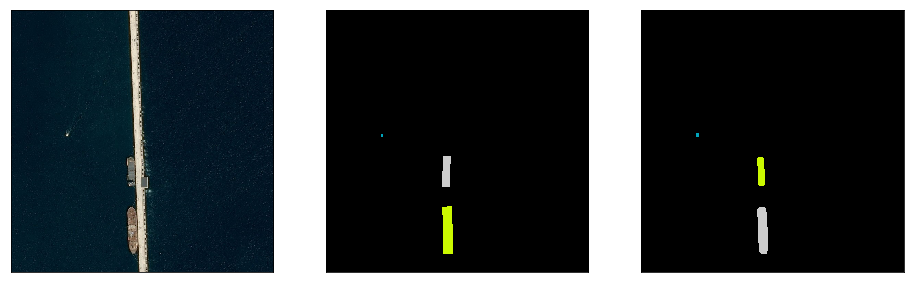

In [7]:
def plot(idx):
    idx_pred = selected_predictions.iloc[idx]
    print('f2 {}'.format(idx_pred['f2']))
    plot_results_for_id(results, idx=idx_pred['ImageId'])
plot(3150)